## UNIVARIATE LINEAR REGRESSION

In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### ONE VARIABLE COST FUNCTION

In [201]:
#np.random.seed(0) #untuk menetapkan nilai random yang sama untuk generator bilangan random
n=50
X = np.linspace(-10,10,n) #membuat array numpy dengan jumlah 'n' data dan terdistribusi merata dari 0 sampai 100
print(X)

[-10.          -9.59183673  -9.18367347  -8.7755102   -8.36734694
  -7.95918367  -7.55102041  -7.14285714  -6.73469388  -6.32653061
  -5.91836735  -5.51020408  -5.10204082  -4.69387755  -4.28571429
  -3.87755102  -3.46938776  -3.06122449  -2.65306122  -2.24489796
  -1.83673469  -1.42857143  -1.02040816  -0.6122449   -0.20408163
   0.20408163   0.6122449    1.02040816   1.42857143   1.83673469
   2.24489796   2.65306122   3.06122449   3.46938776   3.87755102
   4.28571429   4.69387755   5.10204082   5.51020408   5.91836735
   6.32653061   6.73469388   7.14285714   7.55102041   7.95918367
   8.36734694   8.7755102    9.18367347   9.59183673  10.        ]


In [202]:
w0 = np.random.uniform(-10,10)
b0 = np.random.uniform(-10,10)
noise = np.random.uniform(-((w0*X[30])/2),((w0*X[30])/2),size=n) # noise acak
print("w = {}".format(w0))
print("b = {}".format(b0))
print(noise)

w = 9.509846463345962
b = -4.670427356698625
[  6.40912141  -4.49877502   1.32725615   3.30385865 -10.08196678
   2.50718665  -6.88542449  -5.67089637  -5.11105272   9.28265817
 -10.0183159  -10.45068525  -7.65003563  -6.03358165  -5.61081744
  -6.05695206  -7.92328439  -5.44271088   9.79467501   1.66368342
   1.61384099  -1.58377515   1.26246915  -3.73739423  -3.58732149
  -8.84209215   5.86118409   5.25541352  -7.57334391  -4.01948164
   7.76037918  10.49151456  -6.80710228  -8.13496884  -5.94996024
  -2.20840631  -8.64452493  -8.41653357   6.21733566 -10.15167438
  -2.46792334 -10.39611966   9.8533724   -1.11921204   9.1677183
   3.86788058  -0.23139053   1.44435137  -4.27966933  -9.51722952]


In [203]:
y = w0*X+b0+noise
print(y)
print(len(y))

[ -93.35977058 -100.38609702  -90.67849587  -84.82032338  -94.32457883
  -77.85385542  -83.36489657  -78.26879846  -73.82738483  -55.55210396
  -70.97150804  -67.52230741  -60.8400878   -55.34206384  -51.03772964
  -47.60229428  -45.58705662  -39.22491312  -20.10595725  -24.35537886
  -20.5236513   -19.83969746  -13.11188317  -14.23017657  -10.19853384
  -11.57173451    7.01311171   10.28891113    1.34172368    8.77715594
   24.43858674   31.0512921    17.63424525   20.18794867   26.25452726
   33.87765118   31.32310254   35.43266389   53.9481031    41.46066304
   53.02598407   48.97935773   73.11041978   66.01940532   80.18790565
   78.76963791   78.55193679   84.10924867   82.26679796   80.91080776]
50


In [204]:
data = pd.DataFrame({'X':X,'y':y})
data.head()

,X,y
0,-10.000000,-93.359771
1,-9.591837,-100.386097
2,-9.183673,-90.678496
3,-8.775510,-84.820323
4,-8.367347,-94.324579


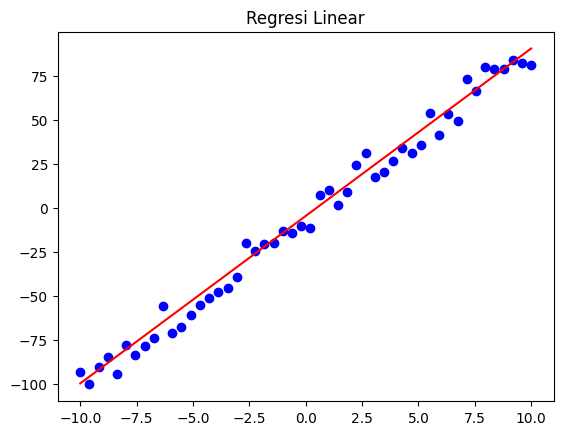

In [205]:
plt.scatter(X,y, color='blue')
plt.plot(X,w0*X+b0, color='red')
plt.title("Regresi Linear")
plt.show()

#### Generate a random linear line and calculate the cost value

In [206]:
def create_random_linear_line():
    w = np.random.uniform(-10,10)
    b = np.random.uniform(-(10**2)*2,(10**2)*2)
    return w,b

a,b = create_random_linear_line()
print(f"{a} {b}")

-9.096888315639946 -76.35139070552515


In [207]:
def plot_line_on_data(w,b,x,y,cost_value):
    plt.scatter(x,y, color='blue')
    plt.plot(x,w*x+b, color='red')
    plt.text(0.4,0.9, f"cost value : {cost_value}", fontsize=8, transform=plt.gca().transAxes, 
         verticalalignment='top', horizontalalignment='right')
    plt.show()

In [208]:
def loss_func(yi,y):
    e = yi-y
    e = e**2
    return e

def y_predict(w,b,X):
    y = w*X+b
    return y

def cost_funct(m,e_total):
    cost = (1/(2*m))*(e_total)
    return cost

def calculate_cost_value(X,y,w,b,m):
    e = 0
    for i in range(m):
        yi = y_predict(w,b,X[i])
        e = e + loss_func(yi,y[i])
    cost = cost_funct(m,e)
    return cost


In [209]:
print(calculate_cost_value(X,y,a,b,n))

8494.459811214101


2.1296810459275317  -  145.19103352573683


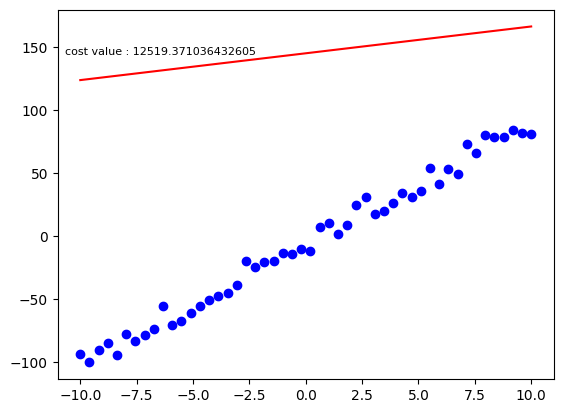

In [210]:
# Generate random linear line and calculate the cost value
a,b = create_random_linear_line()
print(f"{a}  -  {b}")

cost = calculate_cost_value(X,y,a,b,n)
plot_line_on_data(a,b,X,y,cost)

### MINIMIZE COST VALUE TO GET THE BEST LINEAR REGRESSION FORMULA

#### Hanya dengan parameter w

In [211]:
def calculate_cost_value_for_each_weight(min,max,X,y,b,m):
    ar_cost = []
    ar_w = np.arange(min,max,0.5)
    for i in ar_w:
        a = calculate_cost_value(X,y,i,b,m)
        ar_cost.append(a)
    return ar_w,ar_cost
def calculate_cost_value_for_each_bias(min,max,X,y,w,m):
    ar_cost = []
    ar_b = np.arange(min,max,0.5)
    for i in ar_b:
        a = calculate_cost_value(X,y,w,i,m)
        ar_cost.append(a)
    return ar_b,ar_cost

In [212]:
w_val,cost_val = calculate_cost_value_for_each_weight(-20,40,X,y,b,n)
w_val = np.array(w_val)
cost_val = np.array(cost_val)
print(w_val)
print(cost_val)
print(f"Type wval : {type(w_val)}, size: {w_val.shape}, type cost_val: {type(cost_val)}, size: {cost_val.shape}")

[-20.  -19.5 -19.  -18.5 -18.  -17.5 -17.  -16.5 -16.  -15.5 -15.  -14.5
 -14.  -13.5 -13.  -12.5 -12.  -11.5 -11.  -10.5 -10.   -9.5  -9.   -8.5
  -8.   -7.5  -7.   -6.5  -6.   -5.5  -5.   -4.5  -4.   -3.5  -3.   -2.5
  -2.   -1.5  -1.   -0.5   0.    0.5   1.    1.5   2.    2.5   3.    3.5
   4.    4.5   5.    5.5   6.    6.5   7.    7.5   8.    8.5   9.    9.5
  10.   10.5  11.   11.5  12.   12.5  13.   13.5  14.   14.5  15.   15.5
  16.   16.5  17.   17.5  18.   18.5  19.   19.5  20.   20.5  21.   21.5
  22.   22.5  23.   23.5  24.   24.5  25.   25.5  26.   26.5  27.   27.5
  28.   28.5  29.   29.5  30.   30.5  31.   31.5  32.   32.5  33.   33.5
  34.   34.5  35.   35.5  36.   36.5  37.   37.5  38.   38.5  39.   39.5]
[26732.84197215 26224.09715755 25724.02581234 25232.62793652
 24749.90353008 24275.85259303 23810.47512538 23353.7711271
 22905.74059822 22466.38353872 22035.69994862 21613.6898279
 21200.35317656 20795.68999462 20399.70028206 20012.38403889
 19633.74126511 19263.77196

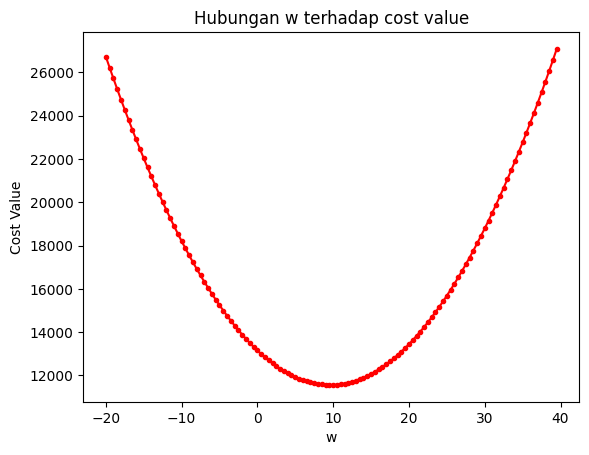

In [213]:
plt.plot(w_val,cost_val, marker='.',linestyle='-',color='red')
plt.title("Hubungan w terhadap cost value")
plt.xlabel("w")
plt.ylabel("Cost Value")
plt.show()

In [214]:
b_val,cost_val = calculate_cost_value_for_each_weight(-20,40,X,y,w,n)
b_val = np.array(b_val)
cost_val = np.array(cost_val)
print(b_val)
print(cost_val)
print(f"Type wval : {type(b_val)}, size: {b_val.shape}, type cost_val: {type(cost_val)}, size: {cost_val.shape}")

[-20.  -19.5 -19.  -18.5 -18.  -17.5 -17.  -16.5 -16.  -15.5 -15.  -14.5
 -14.  -13.5 -13.  -12.5 -12.  -11.5 -11.  -10.5 -10.   -9.5  -9.   -8.5
  -8.   -7.5  -7.   -6.5  -6.   -5.5  -5.   -4.5  -4.   -3.5  -3.   -2.5
  -2.   -1.5  -1.   -0.5   0.    0.5   1.    1.5   2.    2.5   3.    3.5
   4.    4.5   5.    5.5   6.    6.5   7.    7.5   8.    8.5   9.    9.5
  10.   10.5  11.   11.5  12.   12.5  13.   13.5  14.   14.5  15.   15.5
  16.   16.5  17.   17.5  18.   18.5  19.   19.5  20.   20.5  21.   21.5
  22.   22.5  23.   23.5  24.   24.5  25.   25.5  26.   26.5  27.   27.5
  28.   28.5  29.   29.5  30.   30.5  31.   31.5  32.   32.5  33.   33.5
  34.   34.5  35.   35.5  36.   36.5  37.   37.5  38.   38.5  39.   39.5]
[15218.27561279 14709.53079819 14209.45945298 13718.06157716
 13235.33717072 12761.28623368 12295.90876602 11839.20476775
 11391.17423886 10951.81717937 10521.13358926 10099.12346854
  9685.7868172   9281.12363526  8885.1339227   8497.81767953
  8119.17490575  7749.205

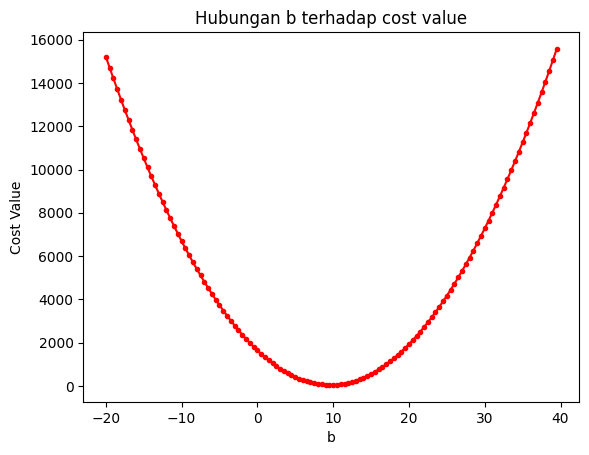

In [215]:
plt.plot(b_val,cost_val, marker='.',linestyle='-',color='red')
plt.title("Hubungan b terhadap cost value")
plt.xlabel("b")
plt.ylabel("Cost Value")
plt.show()

#### Dengan parameter w dan b

In [216]:
def calculate_cost_value_with_w_and_b_parameter(min,max,X,y):
    ar2d_cost = []
    ar_w = np.arange(min,max,0.5)
    ar_b = np.arange(min*4,max*4,0.5)
    for i in ar_b:
        ar_cost = []
        for j in ar_w:
            #print(f"{i},{j}")
            a = calculate_cost_value(X,y,j,i,len(y))
            ar_cost.append(a)
        ar2d_cost.append(ar_cost)
    ar2d_cost = np.array(ar2d_cost)
    return ar_w,ar_b,ar2d_cost

In [217]:
ar_w,ar_b,cost_value_2d = calculate_cost_value_with_w_and_b_parameter(-10,10,X,y)
print(f"{type(ar_b)} {ar_b.shape}")
print(f"{type(ar_w)} {ar_w.shape}")
print(f"{type(cost_value_2d)} {cost_value_2d.shape}")

<class 'numpy.ndarray'> (160,)
<class 'numpy.ndarray'> (40,)
<class 'numpy.ndarray'> (160, 40)


<class 'numpy.ndarray'> (160, 40)
<class 'numpy.ndarray'> (160, 40)


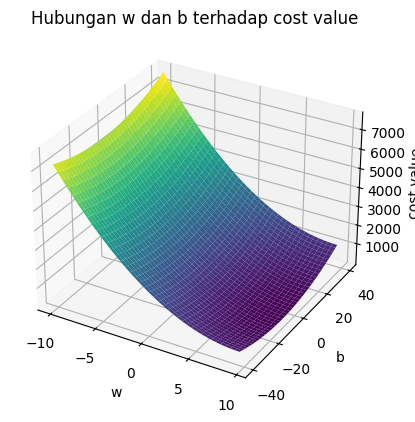

In [218]:
W, B = np.meshgrid(ar_w, ar_b)
print(f"{type(W)} {W.shape}")
print(f"{type(B)} {B.shape}")

# Create a figure and a 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(W, B, cost_value_2d, cmap='viridis', edgecolor='none')

# Set labels and title
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('cost value')
ax.set_title('Hubungan w dan b terhadap cost value')

# Show the plot
plt.show()

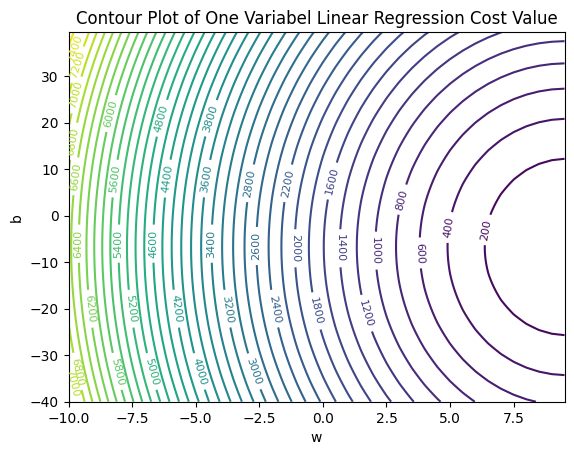

In [219]:
# Membuat contour plot
fig, ax = plt.subplots()

#buat contour plot
contour = ax.contour(W,B,cost_value_2d, levels=50, cmap='viridis')

#tambahkan garis kontur dengan label
ax.clabel(contour, inline=True, fontsize=8)

#atur label dan judul
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_title('Contour Plot of One Variabel Linear Regression Cost Value')

#Tampilkan plot
plt.show()

#### Menggunakan Gradient Descent

In [220]:
# Input Dataset
xi = data['X'].values
yi = data['y'].values

print(f"tipe x: {xi.shape}, tipe y: {yi.shape}")

tipe x: (50,), tipe y: (50,)


In [221]:
# Inisialisasi nilai awal w dan b
w,b=0,0
print(f"w: {w}, b: {b}")

w: 0, b: 0


In [222]:
# Buat fungsi f_wb, dj_dw dan dj_db

# One variable linear regression model
def f_wb(_x,_w,_b):
    fwb = _w*_x+_b
    return fwb

def dj_dw(in_xi,in_yi,in_w,in_b):
    fwb = f_wb(in_xi,in_w,in_b)
    djdw = np.sum((fwb-in_yi)*in_xi)/len(in_yi)
    return djdw
def dj_db(in_xi,in_yi,in_w,in_b):
    fwb = f_wb(in_xi,in_w,in_b)
    djdb = np.sum(fwb-in_yi)/len(in_yi)
    return djdb

# metrics evaluation model
def mse(in_xi,in_yi,in_w,in_b):
    fwb = f_wb(in_xi,in_w,in_b)
    cost = (np.sum((fwb-in_yi)**2))/len(in_yi)
    return cost
def mae(in_xi,in_yi,in_w,in_b):
    fwb = f_wb(in_xi,in_w,in_b)
    cost = np.mean(np.abs(fwb-in_yi))
    return cost
def rmse(mse):
    cost = np.sqrt(mse)
    return cost
def r2(in_xi,in_yi,in_w,in_b):
    fwb = f_wb(in_xi,in_w,in_b)
    cost = 1 - ((np.sum((fwb-in_yi)**2))/(np.sum((fwb-np.mean(in_yi))**2)))
    return cost

# Gradient Descent
def univariate_linear_regression(in_xi,in_yi,in_w,in_b,lr,epoch, display_metrics = False):
    wi = in_w
    bi = in_b
    ar_mae = np.array([])
    ar_w = np.array([])
    ar_b = np.array([])
    mae_val=0
    for i in range(epoch):
        djdw = dj_dw(in_xi,in_yi,wi,bi)
        djdb = dj_db(in_xi,in_yi,wi,bi)
        temp_w = wi-lr*djdw
        temp_b = bi-lr*djdb
        wi = temp_w
        bi = temp_b

        mae_val = mae(in_xi,in_yi,wi,bi)

        ar_mae = np.append(ar_mae,mae_val)
        ar_w = np.append(ar_w,wi)
        ar_b = np.append(ar_b,bi)

    #calculate cost
    if(display_metrics):
        mse_val = mse(in_xi,in_yi,wi,bi)
        mae_val = mae(in_xi,in_yi,wi,bi)
        rmse_val = rmse(mse_val)
        r2_val = r2(in_xi,in_yi,wi,bi)
        
        print("\n\n======= METRICS =======")
        print(f"mae :{mae_val}")
        print(f"mse :{mse_val}")
        print(f"rmse :{rmse_val}")
        print(f"r^2 :{r2_val}")
        print("=======================\n\n")
    return ar_w,ar_b,ar_mae,wi,bi

In [223]:
print(w0,b0)
ar_ww,ar_bb,ar_mae,ww,bb = univariate_linear_regression(xi,yi,w,b,0.01,1000,display_metrics=True)
print(ww,bb)

9.509846463345962 -4.670427356698625


======= METRICS =======
mae :5.453930313226369
mse :40.031341219247935
rmse :6.327032576117175
r^2 :0.9874214645682433


9.577642253299741 -6.710512100733294


In [224]:
# Check metrics value for the best linear regression formula
w_best = 7.666696485958358
b_best = -4.035778140676818
mse_val = mse(xi,yi,w_best,b_best)
mae_val = mae(xi,yi,w_best,b_best)
rmse_val = rmse(mse_val)
r2_val = r2(xi,yi,w_best,b_best)

print("\n\n======= METRICS =======")
print(f"mae :{mae_val}")
print(f"mse :{mse_val}")
print(f"rmse :{rmse_val}")
print(f"r^2 :{r2_val}")
print("=======================\n\n")



======= METRICS =======
mae :10.891238553149288
mse :173.87920164190226
rmse :13.186326313340734
r^2 :0.9150316911213406




In [225]:
print(f"Type arw : {type(ar_ww)}, size arw: {ar_ww.shape}")
print(f"Type arb : {type(ar_bb)}, size arb: {ar_bb.shape}")
print(f"Type arcost : {type(ar_mae)}, size arcost: {ar_mae.shape}")

Type arw : <class 'numpy.ndarray'>, size arw: (1000,)
Type arb : <class 'numpy.ndarray'>, size arb: (1000,)
Type arcost : <class 'numpy.ndarray'>, size arcost: (1000,)


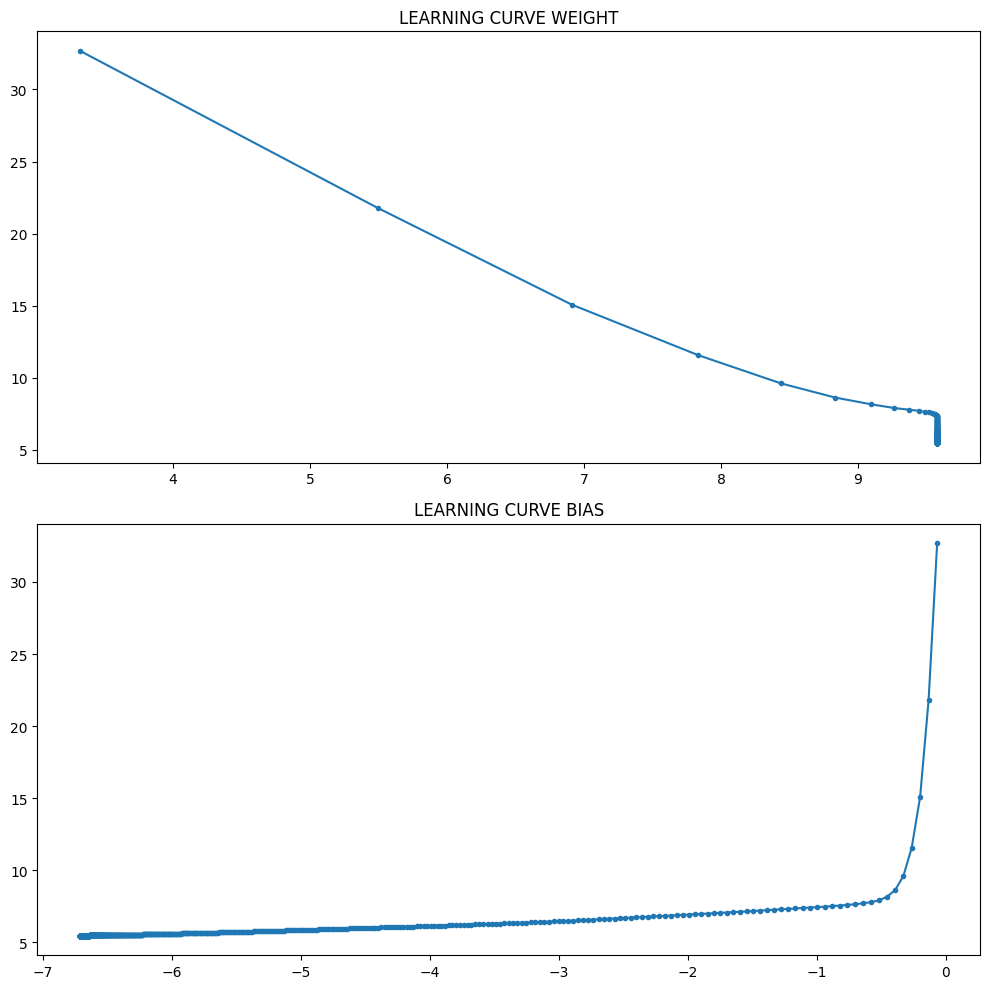

In [226]:
# PLOT LEARNING CURVE
fig, ax = plt.subplots(2,1, figsize=(10,10))

# Learning Curve w
ax[0].plot(ar_ww,ar_mae, marker='.')
ax[0].set_title("LEARNING CURVE WEIGHT")

# Learning Curve b
ax[1].plot(ar_bb,ar_mae, marker='.')
ax[1].set_title("LEARNING CURVE BIAS")

# Mengatur jarak antar plot
plt.tight_layout()

# Menampilkan plot
plt.show()